In [1]:
import pandas as pd
import numpy as np
import gensim

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../input/sinhala-text/sinhala_data.csv')

In [3]:
data

,Source,Suspicious,Label
0,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,True
1,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,දේශප්‍රේමී ජනතා ව්‍යාපාරය නම් වූ අදිසි මිනීමරු...,False
2,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,"රජයට, ආරක්‍ෂක හමුදාවන්ට, විශේෂයෙන් ම පොලිසියට ...",False
3,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,දෙවන ලෝක යුද සමයේ අපේ දුප්පත් පාරිභෝගිකයා අන්ත...,False
4,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,ආණ්ඩුව නීත්‍යානුකූලව බල්ලන් මැරීම තහනම් කර ඇත....,False
...,...,...,...
2531,නපුරු වචන යමිකිසි දරුවෙකුට අහන්න ලැබුණාම එම දර...,නපුරු වචන අහන්න ලැබුණාම යම්කිසි දරුවෙකුට ඒ වචන...,True
2532,නපුරු වචන යමිකිසි දරුවෙකුට අහන්න ලැබුණාම එම දර...,"නපුරු වචන අහන්න ලැබුණාම, යම්කිසි දරුවෙකුට ඒ වච...",True
2533,යම්කිසි දරුවෙකුට පරුෂ වචන අහන්න ලැබුණුවිට එම ව...,නපුරු වචන අහන්න ලැබුණාම යම්කිසි දරුවෙකුට ඒ වචන...,True
2534,යම්කිසි දරුවෙකුට පරුෂ වචන අහන්න ලැබුණුවිට එම ව...,"නපුරු වචන අහන්න ලැබුණාම, යම්කිසි දරුවෙකුට ඒ වච...",True


In [4]:
data['processed_text'] = data['Suspicious'].str.split()

data.head()

,Source,Suspicious,Label,processed_text
0,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,True,"[1917, ඔක්‌තෝබර්, විප්ලවයෙන්, පසු, අධිරාජ්‍යවා..."
1,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,දේශප්‍රේමී ජනතා ව්‍යාපාරය නම් වූ අදිසි මිනීමරු...,False,"[දේශප්‍රේමී, ජනතා, ව්‍යාපාරය, නම්, වූ, අදිසි, ..."
2,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,"රජයට, ආරක්‍ෂක හමුදාවන්ට, විශේෂයෙන් ම පොලිසියට ...",False,"[රජයට,, ආරක්‍ෂක, හමුදාවන්ට,, විශේෂයෙන්, ම, පොල..."
3,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,දෙවන ලෝක යුද සමයේ අපේ දුප්පත් පාරිභෝගිකයා අන්ත...,False,"[දෙවන, ලෝක, යුද, සමයේ, අපේ, දුප්පත්, පාරිභෝගික..."
4,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,ආණ්ඩුව නීත්‍යානුකූලව බල්ලන් මැරීම තහනම් කර ඇත....,False,"[ආණ්ඩුව, නීත්‍යානුකූලව, බල්ලන්, මැරීම, තහනම්, ..."


In [5]:
stop_words = pd.read_csv('../input/sinhala-text/sinhala_stopwords.txt')

stop_words.head()

,ශ්රී
0,මහතා
1,දින
2,ජාතික
3,කරන
4,අමාත්ය


In [6]:
stop_words = stop_words['ශ්රී'].tolist()

removed_sw = data.apply(lambda row: [w for w in row['processed_text'] if w not in stop_words], axis=1)

data['processed_text'] = removed_sw

In [7]:
data.head()

,Source,Suspicious,Label,processed_text
0,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,True,"[1917, ඔක්‌තෝබර්, විප්ලවයෙන්, පසු, අධිරාජ්‍යවා..."
1,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,දේශප්‍රේමී ජනතා ව්‍යාපාරය නම් වූ අදිසි මිනීමරු...,False,"[දේශප්‍රේමී, ව්‍යාපාරය, නම්, වූ, අදිසි, මිනීමර..."
2,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,"රජයට, ආරක්‍ෂක හමුදාවන්ට, විශේෂයෙන් ම පොලිසියට ...",False,"[රජයට,, ආරක්‍ෂක, හමුදාවන්ට,, විශේෂයෙන්, ම, පොල..."
3,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,දෙවන ලෝක යුද සමයේ අපේ දුප්පත් පාරිභෝගිකයා අන්ත...,False,"[දෙවන, ලෝක, යුද, සමයේ, අපේ, දුප්පත්, පාරිභෝගික..."
4,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,ආණ්ඩුව නීත්‍යානුකූලව බල්ලන් මැරීම තහනම් කර ඇත....,False,"[ආණ්ඩුව, නීත්‍යානුකූලව, බල්ලන්, මැරීම, තහනම්, ..."


In [8]:
processed_source = pd.read_csv('../input/sinhala-news-data/adaderana_news.csv')
processed_source

,0
0,රුධිර පරීක්ෂණ පෞද්ගලික අංශයෙන් සිදුකිරීම අද සි...
1,අද(01) සිට රජයේ රෝහල්වලට ඇතුළත් වන සියලු රෝගීන...
2,එට්කා ගිවිසුම - 3වන වටයේ සාකච්ඡා 4දා ඇරඹෙයි
3,ඉන්දු - ශ්‍රී ලංකා ආර්ථික සහ තාක්ෂණික සහයෝගීතා...
4,වෛද්‍ය පාලිත මහීපාල මහතාට නව තනතුරක්
...,...
6532,"කොළඹ, නොරිස් කැනල් මාර්ගයේ වෙළෙඳසැල් කිහිපයක් ..."
6533,විදුලිසැර වැදී වන අලියෙකු මරුට
6534,"ගලෙන්බිදුණු වැව, පළුගස්වැව ප්‍රදේශයේදී විදුලිස..."
6535,යතුරුපැදි හිස්වැසුම් ගැන මූලික කරුණු 10 ක් ගැස...


In [9]:
processed_source = processed_source.drop_duplicates()
processed_source = processed_source['0'].str.split()
processed_source = processed_source.apply(lambda row: [w for w in row if w not in stop_words])
processed_source

0       [රුධිර, පරීක්ෂණ, පෞද්ගලික, අංශයෙන්, සිදුකිරීම,...
1       [අද(01), රජයේ, රෝහල්වලට, ඇතුළත්, වන, සියලු, රෝ...
2       [එට්කා, ගිවිසුම, -, 3වන, වටයේ, සාකච්ඡා, 4දා, ඇ...
3       [ඉන්දු, -, ශ්‍රී, ආර්ථික, සහ, තාක්ෂණික, සහයෝගී...
4             [වෛද්‍ය, පාලිත, මහීපාල, මහතාට, නව, තනතුරක්]
                              ...                        
6532    [කොළඹ,, නොරිස්, කැනල්, මාර්ගයේ, වෙළෙඳසැල්, කිහ...
6533                 [විදුලිසැර, වැදී, වන, අලියෙකු, මරුට]
6534    [ගලෙන්බිදුණු, වැව,, පළුගස්වැව, ප්‍රදේශයේදී, වි...
6535    [යතුරුපැදි, හිස්වැසුම්, මූලික, කරුණු, 10, ක්, ...
6536    [යතුරුපැදිකරුවන්, සහ, යතුරුපැදිවල, ගමන්, කරන්න...
Name: 0, Length: 6468, dtype: object

In [10]:
phrases = gensim.models.phrases.Phrases(processed_source.tolist())
phraser = gensim.models.phrases.Phraser(phrases)
train_phrased = phraser[processed_source.tolist()]

In [11]:
model = gensim.models.word2vec.Word2Vec(sentences=train_phrased, 
                                        window=8, 
                                        min_count=10, 
                                        workers=8, 
                                        epochs=250)

In [12]:
data['wmd_score'] = data.apply(lambda row: model.wv.wmdistance(row['Source'].split(), row['Suspicious'].split()), axis=1)

In [13]:
data.head()

,Source,Suspicious,Label,processed_text,wmd_score
0,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,True,"[1917, ඔක්‌තෝබර්, විප්ලවයෙන්, පසු, අධිරාජ්‍යවා...",0.000000
1,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,දේශප්‍රේමී ජනතා ව්‍යාපාරය නම් වූ අදිසි මිනීමරු...,False,"[දේශප්‍රේමී, ව්‍යාපාරය, නම්, වූ, අදිසි, මිනීමර...",1.330848
2,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,"රජයට, ආරක්‍ෂක හමුදාවන්ට, විශේෂයෙන් ම පොලිසියට ...",False,"[රජයට,, ආරක්‍ෂක, හමුදාවන්ට,, විශේෂයෙන්, ම, පොල...",1.314819
3,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,දෙවන ලෝක යුද සමයේ අපේ දුප්පත් පාරිභෝගිකයා අන්ත...,False,"[දෙවන, ලෝක, යුද, සමයේ, අපේ, දුප්පත්, පාරිභෝගික...",1.342679
4,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,ආණ්ඩුව නීත්‍යානුකූලව බල්ලන් මැරීම තහනම් කර ඇත....,False,"[ආණ්ඩුව, නීත්‍යානුකූලව, බල්ලන්, මැරීම, තහනම්, ...",1.214194


In [14]:
data = data.replace([np.inf, -np.inf], np.nan)

In [15]:
data = data.dropna()

In [16]:
data['wmd_score'] = 1 - data['wmd_score']

In [17]:
data.describe()

,wmd_score
count,2536.000000
mean,-0.133707
std,0.285538
min,-0.375372
25%,-0.305633
50%,-0.264814
75%,-0.123981
max,1.000000


In [18]:
scaler = MinMaxScaler()

data[["wmd_score"]] = scaler.fit_transform(data[["wmd_score"]])

In [19]:
data

,Source,Suspicious,Label,processed_text,wmd_score
0,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,True,"[1917, ඔක්‌තෝබර්, විප්ලවයෙන්, පසු, අධිරාජ්‍යවා...",1.000000
1,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,දේශප්‍රේමී ජනතා ව්‍යාපාරය නම් වූ අදිසි මිනීමරු...,False,"[දේශප්‍රේමී, ව්‍යාපාරය, නම්, වූ, අදිසි, මිනීමර...",0.032372
2,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,"රජයට, ආරක්‍ෂක හමුදාවන්ට, විශේෂයෙන් ම පොලිසියට ...",False,"[රජයට,, ආරක්‍ෂක, හමුදාවන්ට,, විශේෂයෙන්, ම, පොල...",0.044026
3,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,දෙවන ලෝක යුද සමයේ අපේ දුප්පත් පාරිභෝගිකයා අන්ත...,False,"[දෙවන, ලෝක, යුද, සමයේ, අපේ, දුප්පත්, පාරිභෝගික...",0.023770
4,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,ආණ්ඩුව නීත්‍යානුකූලව බල්ලන් මැරීම තහනම් කර ඇත....,False,"[ආණ්ඩුව, නීත්‍යානුකූලව, බල්ලන්, මැරීම, තහනම්, ...",0.117189
...,...,...,...,...,...
2531,නපුරු වචන යමිකිසි දරුවෙකුට අහන්න ලැබුණාම එම දර...,නපුරු වචන අහන්න ලැබුණාම යම්කිසි දරුවෙකුට ඒ වචන...,True,"[නපුරු, වචන, අහන්න, ලැබුණාම, යම්කිසි, දරුවෙකුට...",0.475664
2532,නපුරු වචන යමිකිසි දරුවෙකුට අහන්න ලැබුණාම එම දර...,"නපුරු වචන අහන්න ලැබුණාම, යම්කිසි දරුවෙකුට ඒ වච...",True,"[නපුරු, වචන, අහන්න, ලැබුණාම,, යම්කිසි, දරුවෙකු...",0.578060
2533,යම්කිසි දරුවෙකුට පරුෂ වචන අහන්න ලැබුණුවිට එම ව...,නපුරු වචන අහන්න ලැබුණාම යම්කිසි දරුවෙකුට ඒ වචන...,True,"[නපුරු, වචන, අහන්න, ලැබුණාම, යම්කිසි, දරුවෙකුට...",0.334799
2534,යම්කිසි දරුවෙකුට පරුෂ වචන අහන්න ලැබුණුවිට එම ව...,"නපුරු වචන අහන්න ලැබුණාම, යම්කිසි දරුවෙකුට ඒ වච...",True,"[නපුරු, වචන, අහන්න, ලැබුණාම,, යම්කිසි, දරුවෙකු...",0.338267


In [20]:
data.describe()

,wmd_score
count,2536.000000
mean,0.175709
std,0.207608
min,0.000000
25%,0.050706
50%,0.080384
75%,0.182780
max,1.000000


In [21]:
def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = CountVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [22]:
def get_cosine_score(*strs): 
    vectors = [t for t in get_vectors(*strs)]
    return cosine_similarity(vectors)[0][1]

# since 'cosine_similarity(vectors)' will return a 2x2 matrix here
# in this format: [[1, num], [num, 1]]
# we only need the 'num' value
# so we will return the value of index [0][1] of the matrix

In [23]:
data['cosine_score'] = data.apply(lambda row: get_cosine_score(row['Source'], row['Suspicious']), axis=1)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass input=['1917 ඔක්\u200cතෝබර් විප්ලවයෙන් පසු අධිරාජ්\u200dයවාදීහු සහ බලයෙන් පහ කරන ලද ධනේශ්වර පංතිය හා ඉඩම් හිමියෝ රුසියාවේ කම්කරුවන්ගේ හා ගොවීන්ගේ ජයග්\u200dරහණය පිළිගැනීම ප්\u200dරතික්\u200cෂේප කළෝය.', '1917 ඔක්\u200cතෝබර් විප්ලවයෙන් පසු අධිරාජ්\u200dයවාදීහු සහ බලයෙන් පහ කරන ලද ධනේශ්වර පංතිය හා ඉඩම් හිමියෝ රුසියාවේ කම්කරුවන්ගේ හා ගොවීන්ගේ ජයග්\u200dරහණය පිළිගැනීම ප්\u200dරතික්\u200cෂේප කළෝය.'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass input=['1917 ඔක්\u200cතෝබර් විප්ලවයෙන් පසු අධිරාජ්\u200dයවාදීහු සහ බලයෙන් පහ කරන ලද ධනේශ්වර පංතිය හා ඉඩම් හිමියෝ රුසියාවේ කම්කරුවන්ගේ හා ගොවීන්ගේ ජයග්\u200dරහණය පිළිගැනීම ප්\u200dරතික්\u200cෂේප කළෝය.', 'දේශප්\u200dරේමී ජනතා ව්\u200dයාපාරය නම් වූ අදිසි මිනීමරු සංවිධානයක්\u200c රටේ බොහෝ පළාත්වල කෲර මිනිස්\u2

In [24]:
data

,Source,Suspicious,Label,processed_text,wmd_score,cosine_score
0,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,True,"[1917, ඔක්‌තෝබර්, විප්ලවයෙන්, පසු, අධිරාජ්‍යවා...",1.000000,1.000000
1,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,දේශප්‍රේමී ජනතා ව්‍යාපාරය නම් වූ අදිසි මිනීමරු...,False,"[දේශප්‍රේමී, ව්‍යාපාරය, නම්, වූ, අදිසි, මිනීමර...",0.032372,0.038925
2,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,"රජයට, ආරක්‍ෂක හමුදාවන්ට, විශේෂයෙන් ම පොලිසියට ...",False,"[රජයට,, ආරක්‍ෂක, හමුදාවන්ට,, විශේෂයෙන්, ම, පොල...",0.044026,0.110096
3,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,දෙවන ලෝක යුද සමයේ අපේ දුප්පත් පාරිභෝගිකයා අන්ත...,False,"[දෙවන, ලෝක, යුද, සමයේ, අපේ, දුප්පත්, පාරිභෝගික...",0.023770,0.080582
4,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,ආණ්ඩුව නීත්‍යානුකූලව බල්ලන් මැරීම තහනම් කර ඇත....,False,"[ආණ්ඩුව, නීත්‍යානුකූලව, බල්ලන්, මැරීම, තහනම්, ...",0.117189,0.051709
...,...,...,...,...,...,...
2531,නපුරු වචන යමිකිසි දරුවෙකුට අහන්න ලැබුණාම එම දර...,නපුරු වචන අහන්න ලැබුණාම යම්කිසි දරුවෙකුට ඒ වචන...,True,"[නපුරු, වචන, අහන්න, ලැබුණාම, යම්කිසි, දරුවෙකුට...",0.475664,0.792064
2532,නපුරු වචන යමිකිසි දරුවෙකුට අහන්න ලැබුණාම එම දර...,"නපුරු වචන අහන්න ලැබුණාම, යම්කිසි දරුවෙකුට ඒ වච...",True,"[නපුරු, වචන, අහන්න, ලැබුණාම,, යම්කිසි, දරුවෙකු...",0.578060,0.848615
2533,යම්කිසි දරුවෙකුට පරුෂ වචන අහන්න ලැබුණුවිට එම ව...,නපුරු වචන අහන්න ලැබුණාම යම්කිසි දරුවෙකුට ඒ වචන...,True,"[නපුරු, වචන, අහන්න, ලැබුණාම, යම්කිසි, දරුවෙකුට...",0.334799,0.607692
2534,යම්කිසි දරුවෙකුට පරුෂ වචන අහන්න ලැබුණුවිට එම ව...,"නපුරු වචන අහන්න ලැබුණාම, යම්කිසි දරුවෙකුට ඒ වච...",True,"[නපුරු, වචන, අහන්න, ලැබුණාම,, යම්කිසි, දරුවෙකු...",0.338267,0.609721


In [25]:
data.describe()

,wmd_score,cosine_score
count,2536.000000,2536.000000
mean,0.175709,0.213367
std,0.207608,0.269787
min,0.000000,0.000000
25%,0.050706,0.038809
50%,0.080384,0.088159
75%,0.182780,0.284871
max,1.000000,1.000000


In [26]:
data['wmd_pred'] = data.apply(lambda row: True if row['wmd_score'] > 0.25 else False, axis=1) 
data['cosine_pred'] = data.apply(lambda row: True if row['cosine_score'] > 0.25 else False, axis=1)

In [27]:
data.head()

,Source,Suspicious,Label,processed_text,wmd_score,cosine_score,wmd_pred,cosine_pred
0,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,True,"[1917, ඔක්‌තෝබර්, විප්ලවයෙන්, පසු, අධිරාජ්‍යවා...",1.000000,1.000000,True,True
1,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,දේශප්‍රේමී ජනතා ව්‍යාපාරය නම් වූ අදිසි මිනීමරු...,False,"[දේශප්‍රේමී, ව්‍යාපාරය, නම්, වූ, අදිසි, මිනීමර...",0.032372,0.038925,False,False
2,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,"රජයට, ආරක්‍ෂක හමුදාවන්ට, විශේෂයෙන් ම පොලිසියට ...",False,"[රජයට,, ආරක්‍ෂක, හමුදාවන්ට,, විශේෂයෙන්, ම, පොල...",0.044026,0.110096,False,False
3,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,දෙවන ලෝක යුද සමයේ අපේ දුප්පත් පාරිභෝගිකයා අන්ත...,False,"[දෙවන, ලෝක, යුද, සමයේ, අපේ, දුප්පත්, පාරිභෝගික...",0.023770,0.080582,False,False
4,1917 ඔක්‌තෝබර් විප්ලවයෙන් පසු අධිරාජ්‍යවාදීහු ...,ආණ්ඩුව නීත්‍යානුකූලව බල්ලන් මැරීම තහනම් කර ඇත....,False,"[ආණ්ඩුව, නීත්‍යානුකූලව, බල්ලන්, මැරීම, තහනම්, ...",0.117189,0.051709,False,False


In [28]:
print('Accuracy for Cosine Similarity:', accuracy_score(data['Label'], data['cosine_pred']))
print('Accuracy for WM Distance:', accuracy_score(data['Label'], data['wmd_pred']))
print('F-1 Score for Cosine Similarity:', f1_score(data['Label'], data['cosine_pred']))
print('F-1 Score for WM Distance:', f1_score(data['Label'], data['wmd_pred']))

Accuracy for Cosine Similarity: 0.9475552050473186
Accuracy for WM Distance: 0.9676656151419558
F-1 Score for Cosine Similarity: 0.8877637130801688
F-1 Score for WM Distance: 0.9214559386973181


In [29]:
data.groupby('Label').count()

,Source,Suspicious,processed_text,wmd_score,cosine_score,wmd_pred,cosine_pred
Label,,,,,,,
False,2010,2010,2010,2010,2010,2010,2010
True,526,526,526,526,526,526,526


In [30]:
confusion_wmd = confusion_matrix(data['Label'], data['wmd_pred'])
tn_wmd, fp_wmd, fn_wmd, tp_wmd = confusion_matrix(data['Label'], data['wmd_pred']).ravel()
print(tn_wmd, fp_wmd, fn_wmd, tp_wmd)

1973 37 45 481


In [32]:
confusion_wmd

array([[1973,   37],
       [  45,  481]])

In [33]:
tn_cosine, fp_cosine, fn_cosine, tp_cosine = confusion_matrix(data['Label'], data['cosine_pred']).ravel()
print(tn_cosine, fp_cosine, fn_cosine, tp_cosine)

1877 133 0 526


In [34]:
df_confusion = pd.DataFrame(data=confusion_wmd, 
                            index=['Actual False', 'Actual True'], 
                            columns=['Predicted False', 'Predicted True'])

In [35]:
df_confusion

,Predicted False,Predicted True
Actual False,1973,37
Actual True,45,481


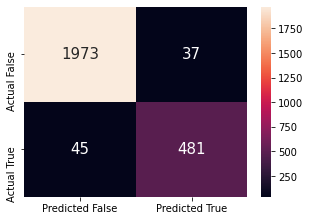

In [36]:
plt.figure(figsize = (5,3.5))
sn.heatmap(df_confusion, annot=True, fmt='.5g', annot_kws={'size': 15})
plt.savefig('confusion_matrix_sinhala_wmd.png', dpi=500)